In [2]:
import pandas as pd

- 데이터셋에 있는 모든 변수는 수치 데이터. 
- 데이터는 개인 정보보호 문제로 인해 PCA 변환 과정을 거침,  변환하지 않은 것은 시간(Time)과 거래액(Amount). 
- 시간은 데이터셋 내 첫번째 거래가 이루어진 시점부터 각 거래가 이루어진 시점 사이의 시간을 초(second) 단위로 기록한 것.

총 284,807 건의 거래데이터가 있으며 각 Column 정보는 아래와 같습니다.

- V1 ~ V28 : 개인정보로 공개되지 않은 값
- Time : 시간
- Amount : 거래금액
- Class : 사기 여부 (1: 사기, 0: 정상)
- 총 31개 Column이 있으며 이 중 시간과 거래금액을 뺀 V1 ~ V28 데이터로 부터 사기 여부(Class)를 예측하는 것을 목표로 합니다.

In [3]:
df = pd.read_csv('data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers


rcParams['figure.figsize'] = 14, 8
# RANDOM_SEED와 LABELS 설정
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [6]:
df.shape

(284807, 31)

In [7]:
df.isnull().values.any()

False

In [8]:
LABELS

['Normal', 'Fraud']

Text(0, 0.5, 'Frequency')

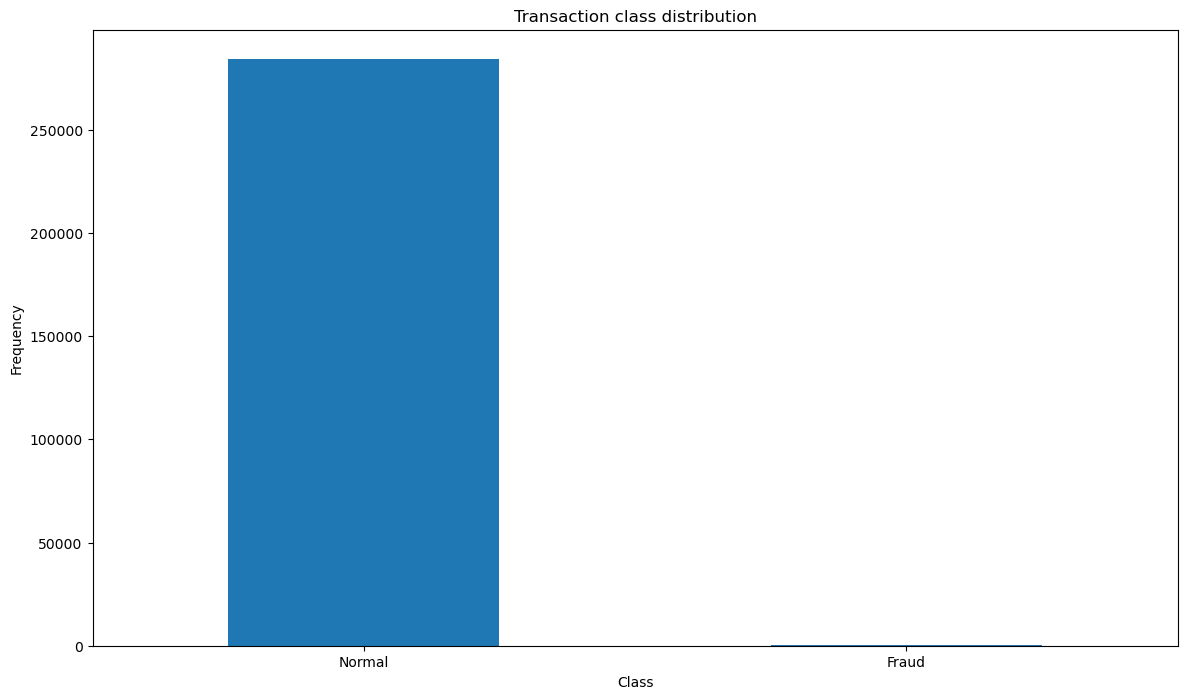

In [10]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

상당한 불균형한 데이터를 가지고 있다. 정상 거래가 이상 거래에 비해 압도적으로 많다

In [11]:
count_classes

0    284315
1       492
Name: Class, dtype: int64

In [13]:
len( df.Class==1)

284807

In [14]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [15]:
from sklearn.preprocessing import StandardScaler
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

- autoencoder: 우리는 모델을 오직 정상 거래기록으로만 훈련. 
- 정상 거래기록을 테스트셋에 넣으면 모델의 성능을 평가할 수 있다.

In [16]:
X_train, X_test = train_test_split(data, test_size=0.2,
 random_state=RANDOM_SEED)

X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(227451, 29)

- 우리가 만들 Autoencoder는 4개의 fully connected layer로 만들어져 있으며, 각 layer는 14, 7, 7, 29개의 뉴런으로 구성되어 있다.
- 처음 두 개의 layer들은 encoder로 쓰이며, 뒤의 두 개는 decoder가 된다. 

In [15]:
input_dim = X_train.shape[1]
input_dim

29

In [17]:
input_dim = X_train.shape[1] #29개컬럼
encoding_dim = 14

model = Sequential()
model.add( Dense( units=encoding_dim, input_dim=X_train.shape[1] ,activation="tanh"))
model.add( Dense( units=7 ,activation="relu"))
model.add( Dense( units=7 ,activation="tanh"))
model.add( Dense( units=input_dim ,activation="relu"))

In [18]:
X_train.shape

(227451, 29)

In [ ]:
# model = Sequential()
# model.add(LSTM(128, activation='relu', input_shape=(X.shape[1],X.shape[2]), return_sequences=True))
# model.add(LSTM(64, activation='relu',return_sequences=True))
# model.add(LSTM(32, activation='relu', return_sequences=True))
# model.add(LSTM(32, activation='relu', return_sequences=True))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# #     model.add( BatchNormalization())
# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(TimeDistributed(Dense(X.shape[2])))
# model.compile(optimizer='adam', loss='mse')
# #     model.summary()

In [19]:
nb_epoch = 10
batch_size = 32
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
history = model.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),verbose=1).history

Epoch 1/10
7108/7108 [==============================] - 10s 1ms/step - loss: 0.8134 - acc: 0.5787 - val_loss: 0.7819 - val_acc: 0.6496
Epoch 2/10
7108/7108 [==============================] - 8s 1ms/step - loss: 0.7376 - acc: 0.6645 - val_loss: 0.7604 - val_acc: 0.6716
Epoch 3/10
7108/7108 [==============================] - 8s 1ms/step - loss: 0.7220 - acc: 0.6791 - val_loss: 0.7497 - val_acc: 0.6813
Epoch 4/10
7108/7108 [==============================] - 9s 1ms/step - loss: 0.7141 - acc: 0.6865 - val_loss: 0.7443 - val_acc: 0.6931
Epoch 5/10
7108/7108 [==============================] - 8s 1ms/step - loss: 0.7094 - acc: 0.6916 - val_loss: 0.7415 - val_acc: 0.6908
Epoch 6/10
7108/7108 [==============================] - 8s 1ms/step - loss: 0.7066 - acc: 0.6960 - val_loss: 0.7393 - val_acc: 0.6940
Epoch 7/10
7108/7108 [==============================] - 8s 1ms/step - loss: 0.7044 - acc: 0.6986 - val_loss: 0.7372 - val_acc: 0.7029
Epoch 8/10
7108/7108 [==============================] - 8s 1m

In [23]:
predictions = model.predict(X_test)
mse = np.mean( (X_test - predictions)**2, axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df

1781/1781 [==============================] - 1s 701us/step


,reconstruction_error,true_class
43428,81.115663,1
49906,0.793549,0
29474,0.243443,0
276481,0.399738,0
278846,0.186454,0
...,...,...
75723,0.672494,0
252263,0.203297,0
221246,0.448705,0
81910,0.105711,0


In [24]:
from sklearn.metrics import confusion_matrix

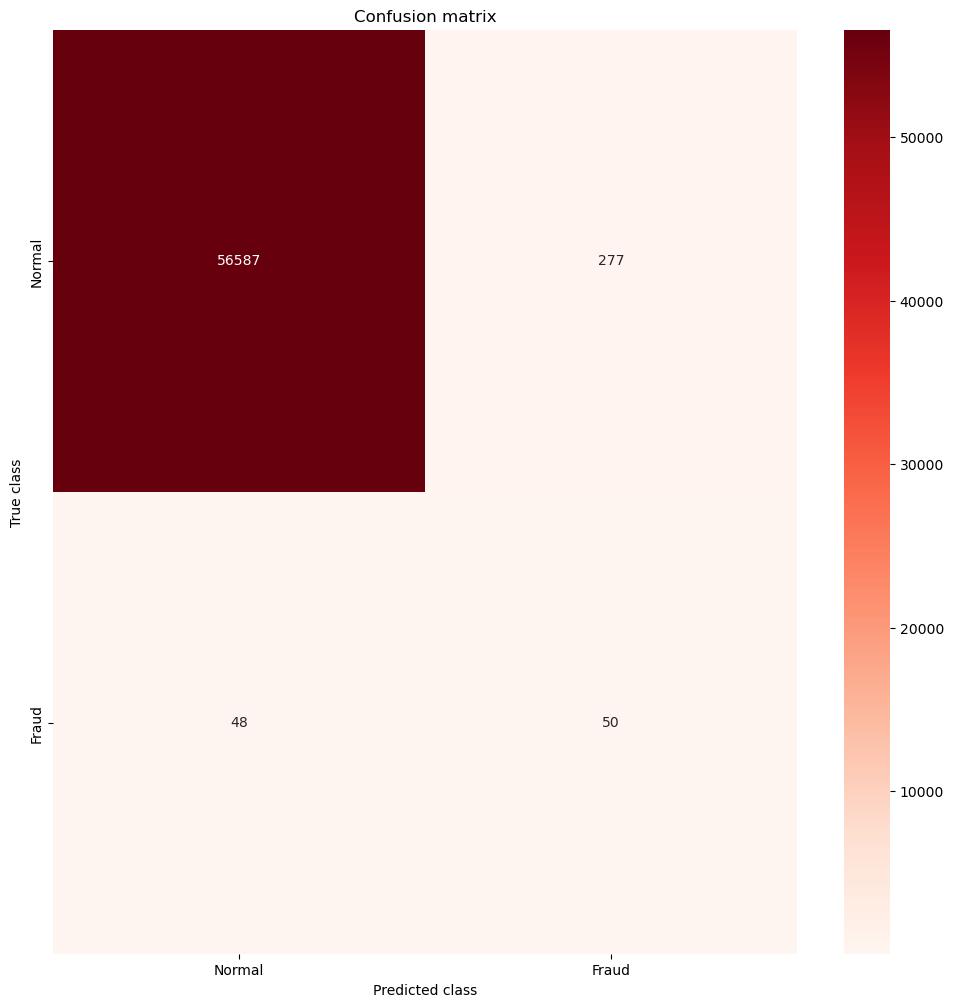

In [25]:
threshold=10
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap='Reds');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()